# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

-----

# Predicciones Finales con los mejores modelos

## Prediccion Serie Reservas

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
from darts import TimeSeries
from darts.models import Theta
from darts.metrics import mape

In [53]:
mape_reservas = pd.read_csv('mape_reservas.csv')
mape_reservas = mape_reservas.drop(columns='Unnamed: 0')
mape_reservas

,Modelo_Reservas,MAPE
0,Best_THETA,0.028940
1,TBATS,0.043893
2,Best_4THETA,0.062771
3,ARIMA,0.086322
4,ETS,0.158757


In [54]:
mape_cancelaciones = pd.read_csv('mape_cancelaciones.csv')
mape_cancelaciones = mape_cancelaciones.drop(columns='Unnamed: 0')
mape_cancelaciones

,Modelo_Cancelaciones,MAPE
0,Best_THETA,0.173412
1,TBATS,0.234251
2,ARIMA,0.251014
3,Best_4THETA,0.425676
4,ETS,0.573190


## Comparando los MAPE's de todos los modelos podemos ver que para predecir reservas y cancelaciones, el mejor modelo es Best Theta. Ahora pasare a predecir el proximo mes de las reservas y cancelaciones a traves del best Theta.

-----

# Predicciones Reservas (Best Theta)

In [55]:
#Lectura
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-07-30,463
2017-08-06,452
2017-08-13,442
2017-08-20,465
2017-08-27,472


In [56]:
df_w_r_theta = df_w_r.copy()
df_w_r_theta.reset_index(level=0, inplace=True)

df_w_r_ts = TimeSeries.from_dataframe(df_w_r_theta,'ArrivalDate','IsCanceled')
train, test = df_w_r_ts.split_before(pd.Timestamp("20170806"))

In [57]:
# Search for the best theta parameter, by trying 50 different values
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:

    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(test))
    res = mape(test, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [58]:
best_theta

0.5714285714285712

In [59]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(test)+4)

<Axes: xlabel='ArrivalDate'>

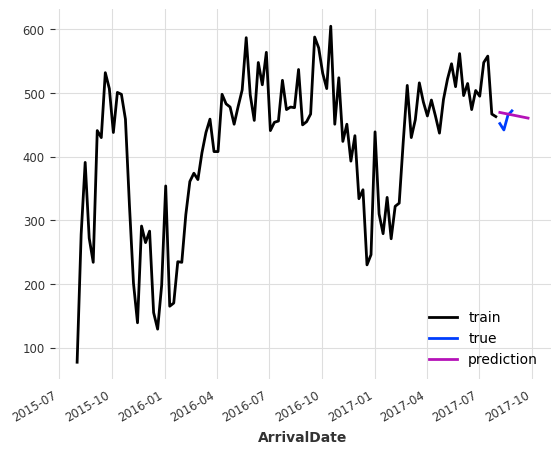

In [60]:
train.plot(label="train")
test.plot(label="true")
pred_best_theta.plot(label="prediction")

In [61]:
pred_best_theta_c = pred_best_theta[4:]
pred_best_theta_c

<TimeSeries (DataArray) (ArrivalDate: 4, component: 1, sample: 1)>
array([[[464.44308892]],

       [[463.17247415]],

       [[461.90185939]],

       [[460.63124463]]])
Coordinates:
  * ArrivalDate  (ArrivalDate) datetime64[ns] 2017-09-03 ... 2017-09-24
  * component    (component) object 'IsCanceled'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [62]:
pred_best_theta_c.to_csv('Pred_Reservas_Javier_Gilabert.csv')

In [63]:
predicciones_reservas = pd.read_csv('Pred_Reservas_Javier_Gilabert.csv')
predicciones_reservas

,ArrivalDate,IsCanceled
0,2017-09-03,464.443089
1,2017-09-10,463.172474
2,2017-09-17,461.901859
3,2017-09-24,460.631245


------

# Predicciones Cancelaciones (Best Theta)

In [64]:
#Lectura
df_w_c = pd.read_csv('df_cancelaciones.csv')
df_w_c['ArrivalDate'] = pd.to_datetime(df_w_c['ArrivalDate'])
df_w_c = df_w_c.set_index('ArrivalDate')
df_w_c.tail()

,IsCanceled
ArrivalDate,
2017-07-30,329
2017-08-06,251
2017-08-13,275
2017-08-20,332
2017-08-27,206


In [65]:
df_w_c_theta = df_w_c.copy()
df_w_c_theta.reset_index(level=0, inplace=True)

df_w_c_ts = TimeSeries.from_dataframe(df_w_c_theta,'ArrivalDate','IsCanceled')
train, test = df_w_c_ts.split_before(pd.Timestamp("20170806"))
from darts.models import Theta, FourTheta
from darts.metrics import mape

In [66]:
# Search for the best theta parameter, by trying 50 different values
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:

    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(test))
    res = mape(test, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [67]:
best_theta

0.16326530612244916

In [68]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(test)+4)


<Axes: xlabel='ArrivalDate'>

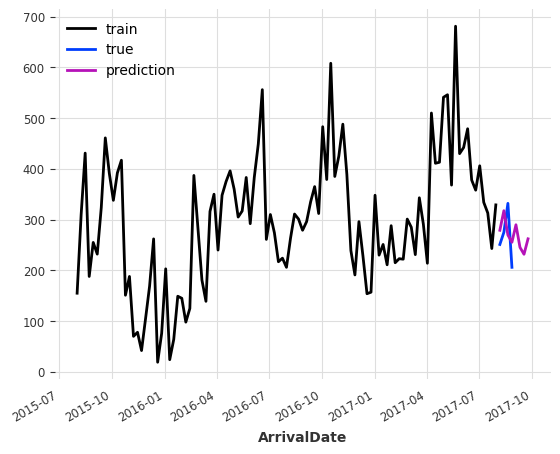

In [69]:
train.plot(label="train")
test.plot(label="true")
pred_best_theta.plot(label="prediction")

In [70]:
pred_best_theta_c = pred_best_theta[4:]
pred_best_theta_c

<TimeSeries (DataArray) (ArrivalDate: 4, component: 1, sample: 1)>
array([[[289.84582327]],

       [[245.35320888]],

       [[231.66706421]],

       [[262.13633893]]])
Coordinates:
  * ArrivalDate  (ArrivalDate) datetime64[ns] 2017-09-03 ... 2017-09-24
  * component    (component) object 'IsCanceled'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [71]:
pred_best_theta_c.to_csv('Pred_Cancelaciones_Javier_Gilabert.csv')

In [72]:
predicciones_cancelaciones = pd.read_csv('Pred_Cancelaciones_Javier_Gilabert.csv')
predicciones_cancelaciones

,ArrivalDate,IsCanceled
0,2017-09-03,289.845823
1,2017-09-10,245.353209
2,2017-09-17,231.667064
3,2017-09-24,262.136339


----